# Weather

Alex Koiter

## Load Libraries

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'janitor'

The following objects are masked from 'package:stats':

    chisq.test, fisher.test

## Read in data

In [ ]:
data <- read_excel(here::here("notebooks/Data/Forrest-Daily-TempRainSoil-20192021-AKoiter.xlsx")) %>%
  clean_names() %>%
  mutate(date = ymd(date),
         year = year(date),
         month = month(date)) %>%
  filter(month >4, month < 11) 

### precip data

In [ ]:
precip <- data %>%
  group_by(year) %>%
  mutate(cumu_precip = cumsum(pluvio_rain)) %>%
  select(date, cumu_precip, pluvio_rain, year)

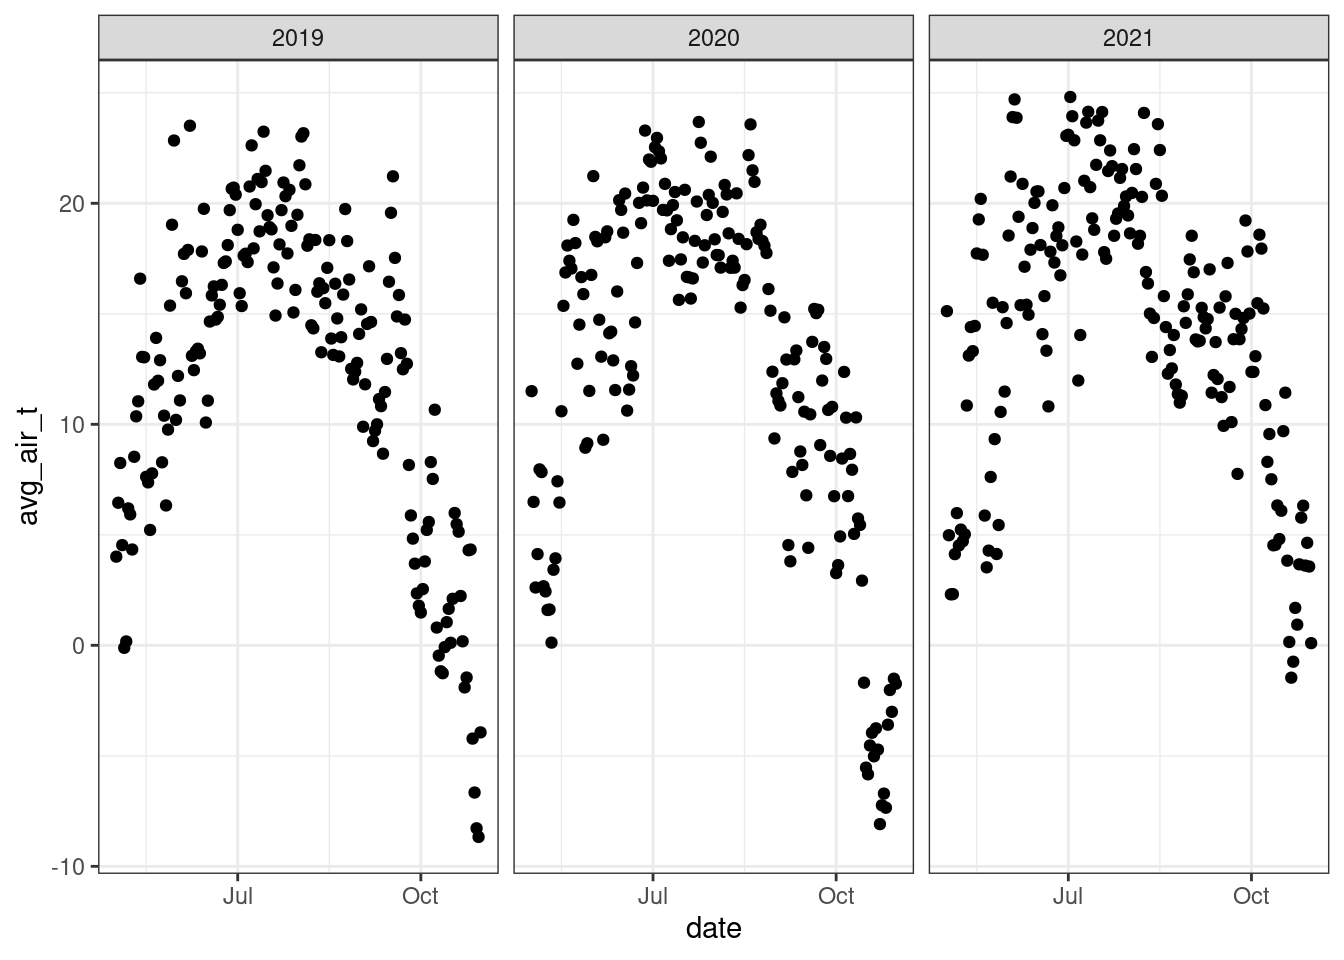

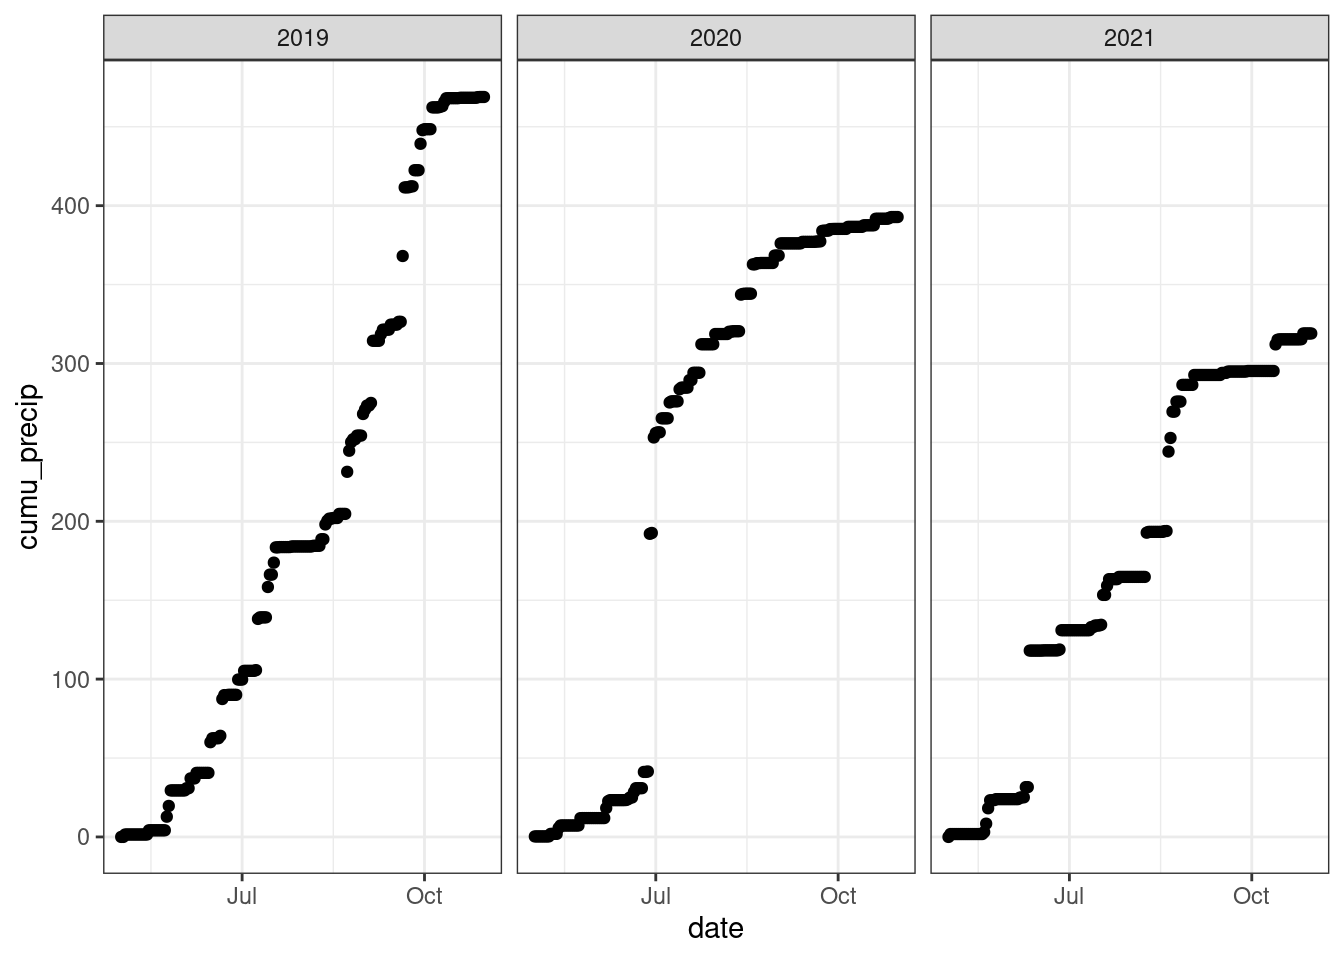

In [ ]:
ggplot(data = data, aes(x = date, y = avg_air_t)) +
  geom_point() +
  theme_bw() +
  facet_wrap(~year, scales = "free_x")

## Sampling dates

In [ ]:
sampling <- tribble(
  ~year,    ~start,                 ~end,                    ~ymin, ~ymax,
  2019,   as_date("2019-09-03"),  as_date("2019-09-15"),   -Inf,    Inf,
  2020,   as_date("2020-09-09"),  as_date("2020-09-21"),   -Inf,    Inf,
  2021,   as_date("2021-09-04"),  as_date("2021-09-16"),   -Inf,    Inf)

In [ ]:
#| label: supp-weather-plot
#| fig-cap: "Average daily air temperature and cumulative rainfall over the growing season over the three year study. Red bars indicate sampling dates"
#| fig-alt: "Average daily air temperature (blue) and cumulative rainfall (black) over the growing season over the three year study. Red bars indicate sampling dates"

ggplot() + 
  theme_bw() +
  geom_rect(data = sampling, aes(xmin = start, xmax = end, ymin = ymin, ymax = ymax), alpha = 0.3, fill = "red") +
  geom_point(data = data, aes(x = date, y = avg_air_t), colour = "skyblue4", size = 2,  shape = 21, fill = "white") + 
  stat_smooth(data = data, aes(x = date, y = avg_air_t), method = "loess", se = FALSE, colour = "skyblue4", linewidth = 1) +
  geom_line(data = precip, aes(x = date, y = cumu_precip/12 -10), colour = "black") +
  scale_y_continuous(name = expression("Daily Temperature " ( degree*C)), 
                     sec.axis = sec_axis(~ (. + 10) * 12 , name = "Cumulative Precipitation (mm)"),
                     limits = c(-10, 30),
                     expand = c(0, 0)) +
  scale_x_date(date_labels = "%b", 
               date_breaks = "1 month", 
               expand = c(0.05,0.05)) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
        axis.title.x = element_blank()) +
  facet_wrap(~year, scale = "free_x")

`geom_smooth()` using formula = 'y ~ x'